Nash equilibrium for multi agent optimal sell in Almgren and Chriss market impact model
==
$\Sigma(t) = \sum^n_{i=1} X^*_i(t)$

where: 

- n : number of agents
- $X^*_i(t)$ : optimal inventory holding for each agent at time t
- $\Sigma(t)$ : sum of the optimal inventories (total volume traded by the agents)

Closed form nash equilibrium  in this case is:

$$ \Sigma(t) = \frac{n \bar{x}_n}{2\sinh{(\hat{\rho}\,\, T)}} \left(  e^{\hat{\rho}\,\, T}e^{\rho_{-}\,\,t} - e^{-\hat{\rho}\,\, T } e^{\rho_{+}\,\, t}  \right) $$

where:

- $\hat{\rho} = \frac{\sqrt{(n-1)^2\gamma^2 + 4(n+1)\alpha\sigma^2\lambda}} {2(n+1)\lambda}$
- T : number of steps in the time window
- $\rho_{\pm} = - \frac{(n-1)\gamma}{2(n+1)\lambda} \pm \hat{\rho}$
- $\lambda$ : temporary impact
- $\gamma$ : permanent impact
- $\sigma$ : volatility of the asset
- $\alpha$ : risk aversion for CARA utility

Here it is assumed that the market model is Almgren-Chriss, thus no buy actions in a selling program.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math as m

def heat_v(states):
    arr = states
    df = pd.DataFrame(np.nan, index=np.arange(0, 21), columns=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
    #df = df.fillna(-1)
    z = df.to_numpy()
    ds = pd.DataFrame(arr, columns=['Q', 'T', 'x'])
    h = ds.groupby(['Q', 'T']).mean().reset_index()
    a = h.to_numpy()

    for i in range(31):  # Maximum inventory is 20
        for ii in range(0, 11):  # Maximum time is 5
            for iii in range(len(a)):
                if i == a[iii, 0] and ii == a[iii, 1]:
                    z[int(i), int(ii)] = a[iii, 2]
    sns.heatmap(z, cmap="YlGnBu")
    plt.xlabel('Time')
    plt.ylabel('Inventory') 
    plt.title('Heatmap of the average action per inventory and time step')
    plt.show()

def column_min_max_normalize(matrix, min, max):#, data
    """
    Normalizes a matrix of real numbers between 1 and -1 domain using min-max normalization.
    """
    # Find the minimum and maximum values for each column
    #scaler = pre.MinMaxScaler(feature_range=(-1, 1)).fit(matrix)
    min_vals = min#np.min(matrix, axis=0)#np.min(data)#
    max_vals = max#np.max(matrix, axis=0)#np.max(data)#
    range_vals = max_vals - min_vals
    
    # Perform column-wise min-max normalization
    normalized_matrix = 2 * (matrix - min_vals) / range_vals - 1
    
    if normalized_matrix.shape != ():
        for i in range(normalized_matrix.shape[0]):
            for ii in range(normalized_matrix.shape[1]):
                if normalized_matrix[i,ii] > 1: normalized_matrix[i,ii] = 1
                elif normalized_matrix[i,ii] <-1: normalized_matrix[i,ii] = -1

    return normalized_matrix 

def heatAct(data, min, max):

    n = 101
    #data = mu0qtp
    FILLER = -1
    def heatdn(states, thr1, thr2, h_min, h_max):
        arr = states
        df = pd.DataFrame(np.nan, index=np.arange(-1,n), columns=['1', '2', '3', '4', '5','6','7','8','9','10'])
        df = df.fillna(np.nan)
        z = df.to_numpy()#np.zeros((21,5))
        ds = pd.DataFrame(arr,columns=['Q', 'T', 'p', 'x'])
        ds['p'] = ds['p'].apply(column_min_max_normalize, args=(h_min, h_max))
        h = ds.where(ds['p'] >= thr1).where(ds['p'] <= thr2).groupby(['Q','T','p']).mean().reset_index()
        a = h.to_numpy()
        for i in range(n): #mx 20
            for ii in range(10): #mx 5
                for iii in range(len(a[:])):
                    if i == a[:,0][iii] and ii == a[:,1][iii]:
                        z[int(i),int(ii)] = a[iii,3]
        return z    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(10, 20))

    # Loop through each subplot and generate a heatmap for it
    cmap = sns.color_palette("YlGnBu", as_cmap=True)
    cmap.set_bad((1,1,0.7))
    #ns.heatmap(z, cmap=cmap)
    for i in range(2):
        for j in range(2):
            if i == 0 and j == 0:

                ax = sns.heatmap(heatdn(data,-0.75  ,-0.5, min,  max), ax=axs[i,j], cmap=cmap)
                ax.set_title('$-1 \leq \\bar{S} \leq -0.5$')#                

            elif i == 0 and j == 1:
                ax =sns.heatmap(heatdn(data,-0.5  ,0, min,  max), ax=axs[i,j],  cmap=cmap)
                ax.set_title('$-0.5 \leq \\bar{S} \leq 0$')#
            elif i == 1 and j == 0:
                ax =sns.heatmap(heatdn(data,0  ,0.5, min,  max), ax=axs[i,j],   cmap=cmap)
                ax.set_title('$0 \leq \\bar{S} \leq 0.5$')#
            else:
                ax =sns.heatmap(heatdn(data,0.5  ,0.75, min,  max), ax=axs[i,j],   cmap=cmap)
                ax.set_title('$0.5 \leq \\bar{S} \leq 1$')#
            #for h in range(len(q)):
            #    rect = plt.Rectangle((h, int(q[h])), 1, 1, fill=None, edgecolor='red', linewidth=1)
            #    ax.add_patch(rect)   
    # Add a main title to the figure
    fig.suptitle('Average $v$ conditioned to Q,T,$\\bar{S}$')

    # Show the figure
    plt.show()
    
def remove_outliers(data):
    # Calculate the IQR (Interquartile Range)
    Q1 = np.percentile(data, 10)
    Q3 = np.percentile(data, 90)
    IQR = Q3 - Q1

    # Define lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    return filtered_data

def rewards_per_episode(rew_0, rew_1, rew_sch_0, rew_sch_1):
    # Load rewards data
    rewards_0 = rew_0
    rewards_1 = rew_1

    # Load rewards_sch data
    rewards_sch_0 = rew_sch_0
    rewards_sch_1 = rew_sch_1

    # Time steps to plot
    time_steps_to_plot = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]

    # Create figure and subplots
    fig, axs = plt.subplots(2, len(time_steps_to_plot)//2, figsize=(20, 8))

    # Store all data points in lists
    all_rewards_0 = []
    all_rewards_1 = []

    # Plot scatter plots for specified time steps
    for i, time_step in enumerate(time_steps_to_plot):
        row = i // (len(time_steps_to_plot)//2)
        col = i % (len(time_steps_to_plot)//2)
        ax = axs[row, col]

        # Generate a list of colors for each point
        colors = plt.cm.jet_r(np.linspace(0, 1, len(rewards_0)))  # Different colormap for rewards_0
        colors_sch = plt.cm.Set2(np.linspace(0, 1, len(rewards_sch_0)))  # Different colormap for rewards_sch

        # Plot rewards_0 and rewards_1
        for j in range(len(rewards_0)):
            ax.scatter(rewards_0[j, time_step], rewards_1[j, time_step], color=colors[j], s=300, alpha=1, label=f'time step {j+1}')
            ax.text(rewards_0[j, time_step], rewards_1[j, time_step], str(j+1), ha='center', va='center', fontsize=8, color='white')

        # Plot rewards_sch_0 and rewards_sch_1
        for k in range(len(rewards_sch_0)):
            ax.scatter(rewards_sch_0[k, time_step], rewards_sch_1[k, time_step], color=colors_sch[k], s=300, alpha=0.25, label=f'time step Sch. {k+1}')
            ax.text(rewards_sch_0[k, time_step], rewards_sch_1[k, time_step], str(k+1), ha='center', va='center', fontsize=8, color='white')

        ax.set_xlabel('Reward Ag. 1')
        ax.set_ylabel('Reward Ag. 2')
        #ax.hlines(0, -100, 100, colors='k', linestyles='dashed', alpha=0.5)
        #ax.vlines(0, -100, 100, colors='k', linestyles='dashed', alpha=0.5)
        ax.set_title(f'Scatter Plot episode {time_step}')

        # Store all data points
        all_rewards_0.extend(rewards_0[:, time_step])
        all_rewards_1.extend(rewards_1[:, time_step])

    # Set the same x-axis and y-axis limits for all subplots
    #for ax in axs.flat:
    #    ax.set_xlim(-70, 70)
    #    ax.set_ylim(-70, 70)
    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1), title='Legend')
    
    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

Agents mean, stddev, median respectively: 27.31606906500673 0.25837654854999964 27.308966124866743


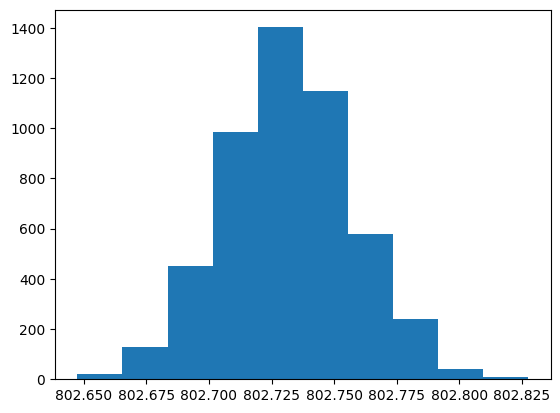

In [38]:
q_0 = 200
T = 10
gamma = 0.001 # permanent impact k
lambd = 0.002 # temporary impact a
alpha = 1e-9 # risk aversion 
sigma = 0.00001 # volatility 
theta_hat = np.sqrt(gamma**2 + 4*alpha*sigma**2*lambd)/(2*lambd)
rho_hat = np.sqrt(gamma**2+12*alpha*sigma**2*lambd)/(6*lambd)
rho_plus = -gamma/(6*lambd) + rho_hat
rho_minus = -gamma/(6*lambd) - rho_hat
a = [q_0,]
for i in range(1,T+1):
    a.append((q_0 )/(2*m.sinh(rho_hat*T)) * (m.exp(rho_hat * T) * m.exp(rho_minus*i) - m.exp(-rho_hat * T) * m.exp(rho_plus*i)))

import modello_QTP_multi_prova as md
numIt = 5000
PASSI = 10
INV = q_0
PERM_IMP = 0.001
TEMP_IMP = 0.002
act = []
re = []
transaction_cost_balance = []
std_list = []
mean_list = []
states = []
ql = []
ac = []
dat = []
VOLA = 0.001
a_hist = []
k_hist = []
rew = []
for j in range(numIt):
    slices = PASSI

    inv = INV
    tempo = 0
    s_0 = 10
    x = 0
    ke0 = PERM_IMP
    ey0 = TEMP_IMP
    
    x = abs(np.diff(np.asarray(a)))

    for i in range(slices):
        a_hist.append(ey0)
        k_hist.append(ke0)
        k = 0.001 * np.ones(T)#np.array([0.00029, 0.00048, 0.00067, 0.00086, 0.00105, 0.00124, 0.00143, 0.00162, 0.00181, 0.002  ])
        dati = md.Ambiente(T = 1, sigma = VOLA, S0 = s_0, action = x[i], kappa = k[i]).abm(numIt = 1).flatten()
        selling_strategy = []
        tempo += 1
        s_0 = dati[-1]

        inv = inv-x[i]
        rew.append(- q_0*2 + s_0*x[i] - 0.002*x[i]**2)
        
        a_hist.append(ey0)
        k_hist.append(ke0)
        act.append(x)
        states.append([inv + x, tempo, x])
        selling_strategy.append(x)
        dat.append(dati)
a_hist = np.asarray(    a_hist)
k_hist = np.asarray(    k_hist)

azioni_st = x#/2
dati =  np.asarray(dat)


'''Implementation Shortfalls'''

#rew = np.zeros(5000)
azioni_st = np.ones((5_000,10)) * x
iss = (2000-(dati[:,0] * azioni_st.flatten() - 0.002 * azioni_st.flatten()**2).reshape(-1,10).sum(axis=1))

print('Agents mean, stddev, median respectively:', remove_outliers(iss).mean(), iss.std(), np.median(iss))

rewards_sch = 1000-(dati[:,0] * azioni_st.flatten() - 0.002 * azioni_st.flatten()**2).reshape(-1,10).mean(axis=1)
dati_sch = dati[:,0] 
plt.hist(rewards_sch, bins=10);

In [39]:
dati = dati[:,0]
at = []
azioni = abs(np.diff(np.asarray(a)))
for i in range(dati.reshape(-1,10).shape[0]):
    at.append(dati.reshape(-1,10)[i]* azioni_st.reshape(-1,10) [i] - 0.002 * azioni_st.reshape(-1,10) [i] **2)

In [40]:
at = np.asarray(at)
theo_age = 40-at

In [41]:
theo_age = theo_age.reshape(-1,10).mean(axis=1)

In [42]:
rewards = dict(np.load('C:/Users/macri/Desktop/ennesima/re.npz', allow_pickle=True)) 
rewards_age_tot = rewards['arr_0'][0] + rewards['arr_0'][1]

In [43]:
rewards_age_tot.mean(), rewards_age_tot.std(), np.median(rewards_age_tot)

(2.2426095504576558, 124.4997648211724, 31.7363033768211)

In [44]:
rewards_age_tot.reshape(10,-1).mean(axis=0).mean(), rewards_age_tot.reshape(10,-1).mean(axis=0).std(axis=0), np.median(rewards_age_tot.reshape(10,-1), axis=0)

(2.242609550457649,
 0.05313013898224255,
 array([27.53038676, 35.71433206, 35.71464181, ..., 35.7145636 ,
        35.71454322, 35.71469854]))

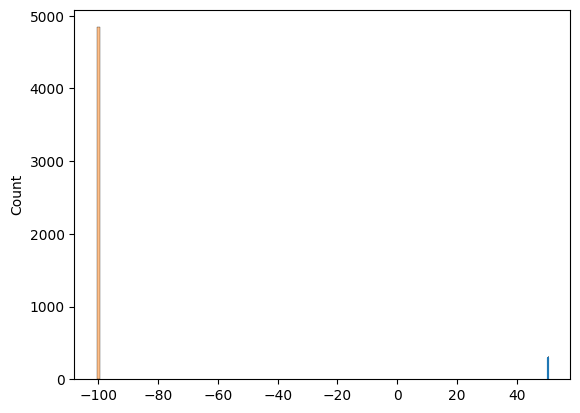

In [45]:
import seaborn as sns
sns.histplot(remove_outliers(rewards['arr_0'][0].reshape(T,-1)[5,:]), kde=True) 
sns.histplot(remove_outliers(-rewards['arr_0'][1].reshape(T,-1)[5,:]), kde=True)

#rewards_sch = (dati_sch * azioni_st.flatten() - 0.002 * azioni_st.flatten()**2).reshape(-1,10).mean(axis=1)
#sns.histplot(40-remove_outliers(rewards_sch), bins=10, kde=False);
plt.show()


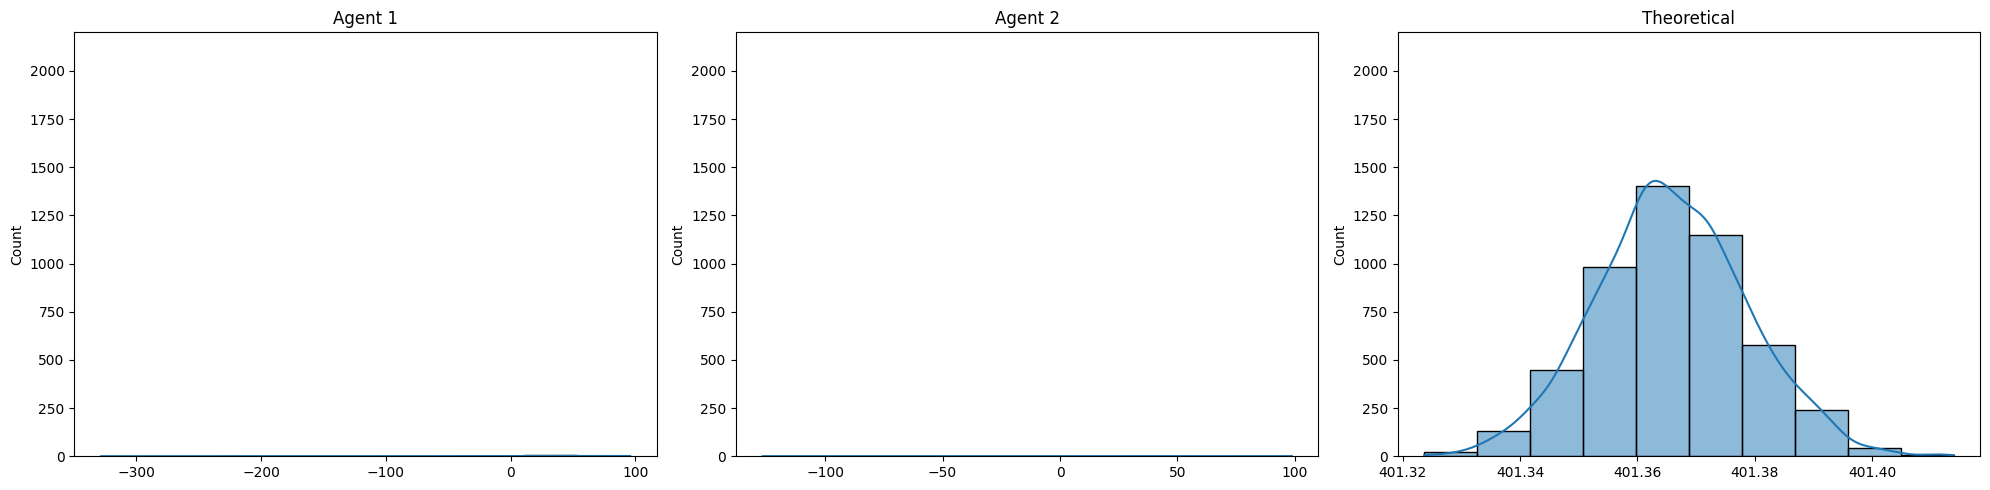

In [46]:
# Create a grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot the first histogram
sns.histplot(remove_outliers(rewards['arr_0'][0].reshape(10,-1).mean(axis=1)), bins=10, kde=True, ax=axs[0])
axs[0].set_title('Agent 1')
axs[0].set_ylim(0, 2200)

# Plot the second histogram
sns.histplot(remove_outliers(rewards['arr_0'][1].reshape(10,-1).mean(axis=1)), bins=10, kde=True, ax=axs[1])
axs[1].set_title('Agent 2')
axs[1].set_ylim(0, 2200)

# Plot the third histogram
sns.histplot(rewards_sch/2, bins=10, kde=True, ax=axs[2])
axs[2].set_title('Theoretical')
axs[2].set_ylim(0, 2200)

#axs.set_ylim(0, 2000)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


In [47]:
#dati = dati['arr_0']#[:,0]
at = []
azioni = abs(np.diff(np.asarray(a)))
for i in range(dati.reshape(-1,10).shape[0]):
    at.append(dati[i]* azioni - 0.002 * azioni**2)

media IS degli agenti = 25.390131558841404
mediana IS degli agenti = 25.390061690081893
stddev IS degli agenti = 0.37187081966510604


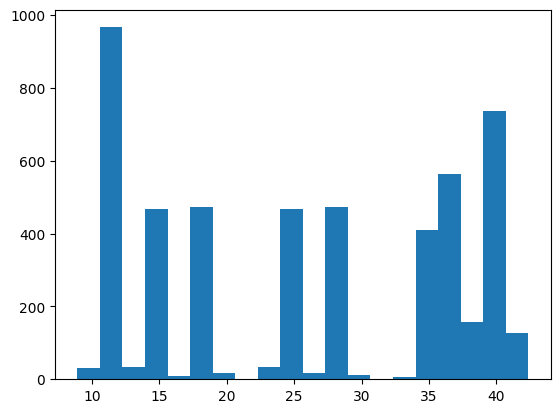

In [48]:
'''Implementation Shortfalls'''
dati =  dict(np.load('C:/Users/macri/Desktop/ennesima/dati.npz', allow_pickle=True)) # non unc
azioni =  dict(np.load('C:/Users/macri/Desktop/ennesima/azioni.npz', allow_pickle=True))

dati = dati['arr_0'][:,0]
azioni1 = azioni['arr_0'][0]#.mean(axis=1)
azioni2 = azioni['arr_0'][1]#.mean(axis=1)
azioni = (azioni1 + azioni2) 
iss = []

for i in range(dati.reshape(-1,T).shape[0]):
    iss.append((dati.reshape(-1,T)[i])* azioni[:,i] - 0.002 * azioni[:,i]**2)
    
agents = np.sum((np.asarray(iss)),axis=1)
agents_std = np.sum((np.asarray(iss)),axis=1).std()
print('media IS degli agenti =',  2000-remove_outliers(agents).mean())
print('mediana IS degli agenti =',2000-np.median(agents))
print('stddev IS degli agenti =',agents_std)

rewards = 2000-(dati * azioni.flatten() - 0.002 * azioni.flatten()**2).reshape(T,-1).sum(axis=0)
plt.hist(remove_outliers(rewards), bins=20);

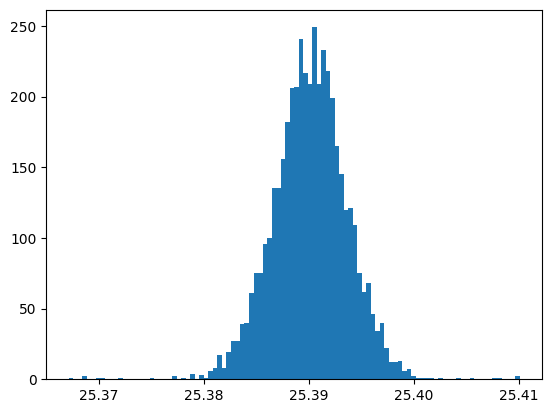

In [49]:
plt.hist(2000-remove_outliers(agents), bins=100);

''

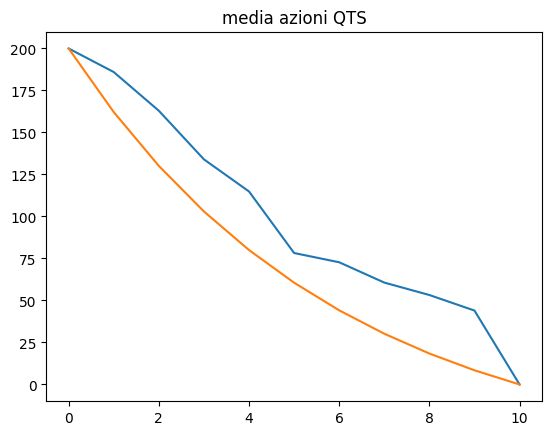

In [55]:
'''Somma inventari per volumi totali tradati da etrambi gli agenti'''
azioni = dict(np.load('C:/Users/macri/Desktop/ennesima/azioni.npz', allow_pickle=True))
q_0 = 200#q_0 #* 2#/4
azioni1 = azioni['arr_0'][0].mean(axis=1)
azioni2 = azioni['arr_0'][1].mean(axis=1)
azioni = (azioni1 + azioni2)#/2
q0 = np.zeros(T+1) 
q0[0] = q_0
for i in range(1,T):
    q0[i] =  q0[i - 1] - azioni[i - 1]

azioni_tw = np.ones((5_000,T)) * 2
twat = azioni_tw.reshape(-1,T).mean(0)
twap = np.zeros(T+1) 
twap[0] = q_0 
for i in range(1,T):
    twap[i] =  twap[i - 1] - twat[i - 1]

plt.plot(q0)
plt.plot(np.asarray(a))

plt.title('media azioni QTS')
;

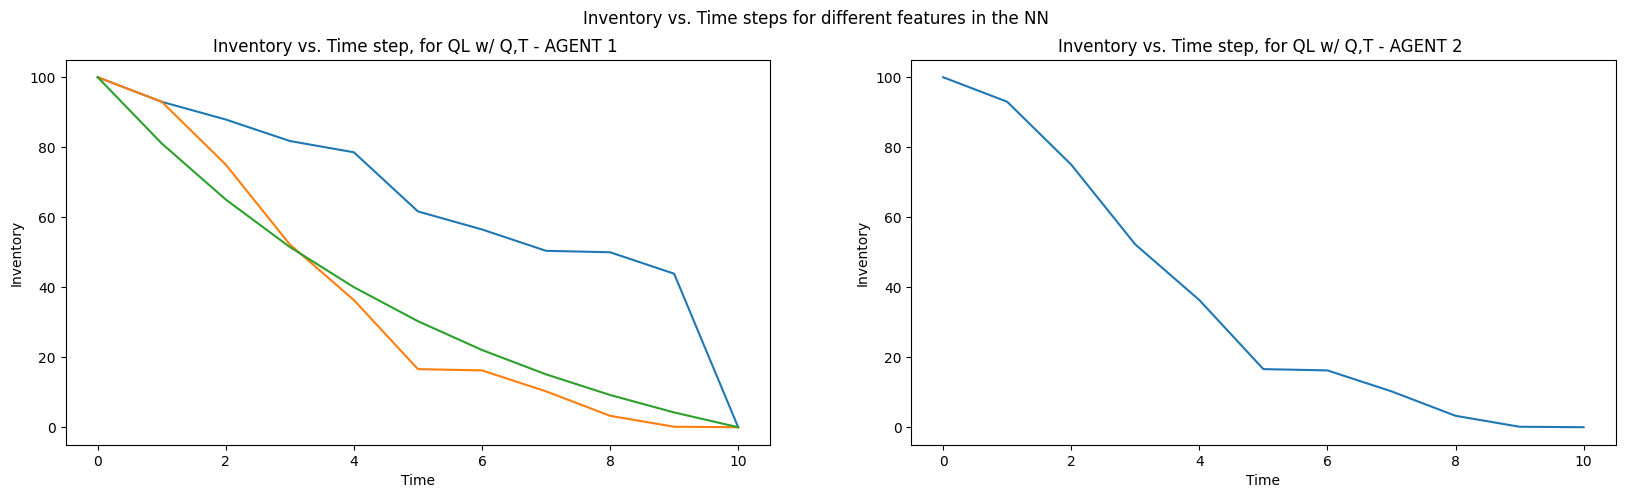

In [57]:
'''Livelli di Inventario'''
INV = 100
T = 10
azioni = dict(np.load('C:/Users/macri/Desktop/ennesima/azioni.npz', allow_pickle=True))
azionimu0 = azioni['arr_0'][0].mean(axis=1)
q0 = np.zeros(T + 1) 
q0[0] = INV
for i in range(1,T):
    q0[i] =  q0[i - 1] - azionimu0[i - 1]

azionimu0qtp = azioni['arr_0'][1].mean(axis=1)
q = np.zeros(T+1) 
q[0] = INV
for i in range(1,T):
    q[i] =  q[i - 1] - azionimu0qtp[i - 1]

azioni_tw = np.ones((5_000,T)) * 10
twat = azioni_tw.reshape(-1,T).mean(0)
twap = np.zeros(21) 
twap[0] = INV
for i in range(1,T):
    twap[i] =  twap[i - 1] - twat[i - 1]
b = np.asarray(a)/2#/5

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].plot(q0)
axs[0].plot(q)
axs[0].plot(b)
axs[0].set_ylabel('Inventory')
axs[0].set_xlabel('Time')
axs[0].set_title('Inventory vs. Time step, for QL w/ Q,T - AGENT 1 ')

axs[1].plot(q)
#axs[1].plot(b)
axs[1].set_ylabel('Inventory')
axs[1].set_xlabel('Time')
axs[1].set_title('Inventory vs. Time step, for QL w/ Q,T - AGENT 2 ')

fig.suptitle('Inventory vs. Time steps for different features in the NN')

plt.show()

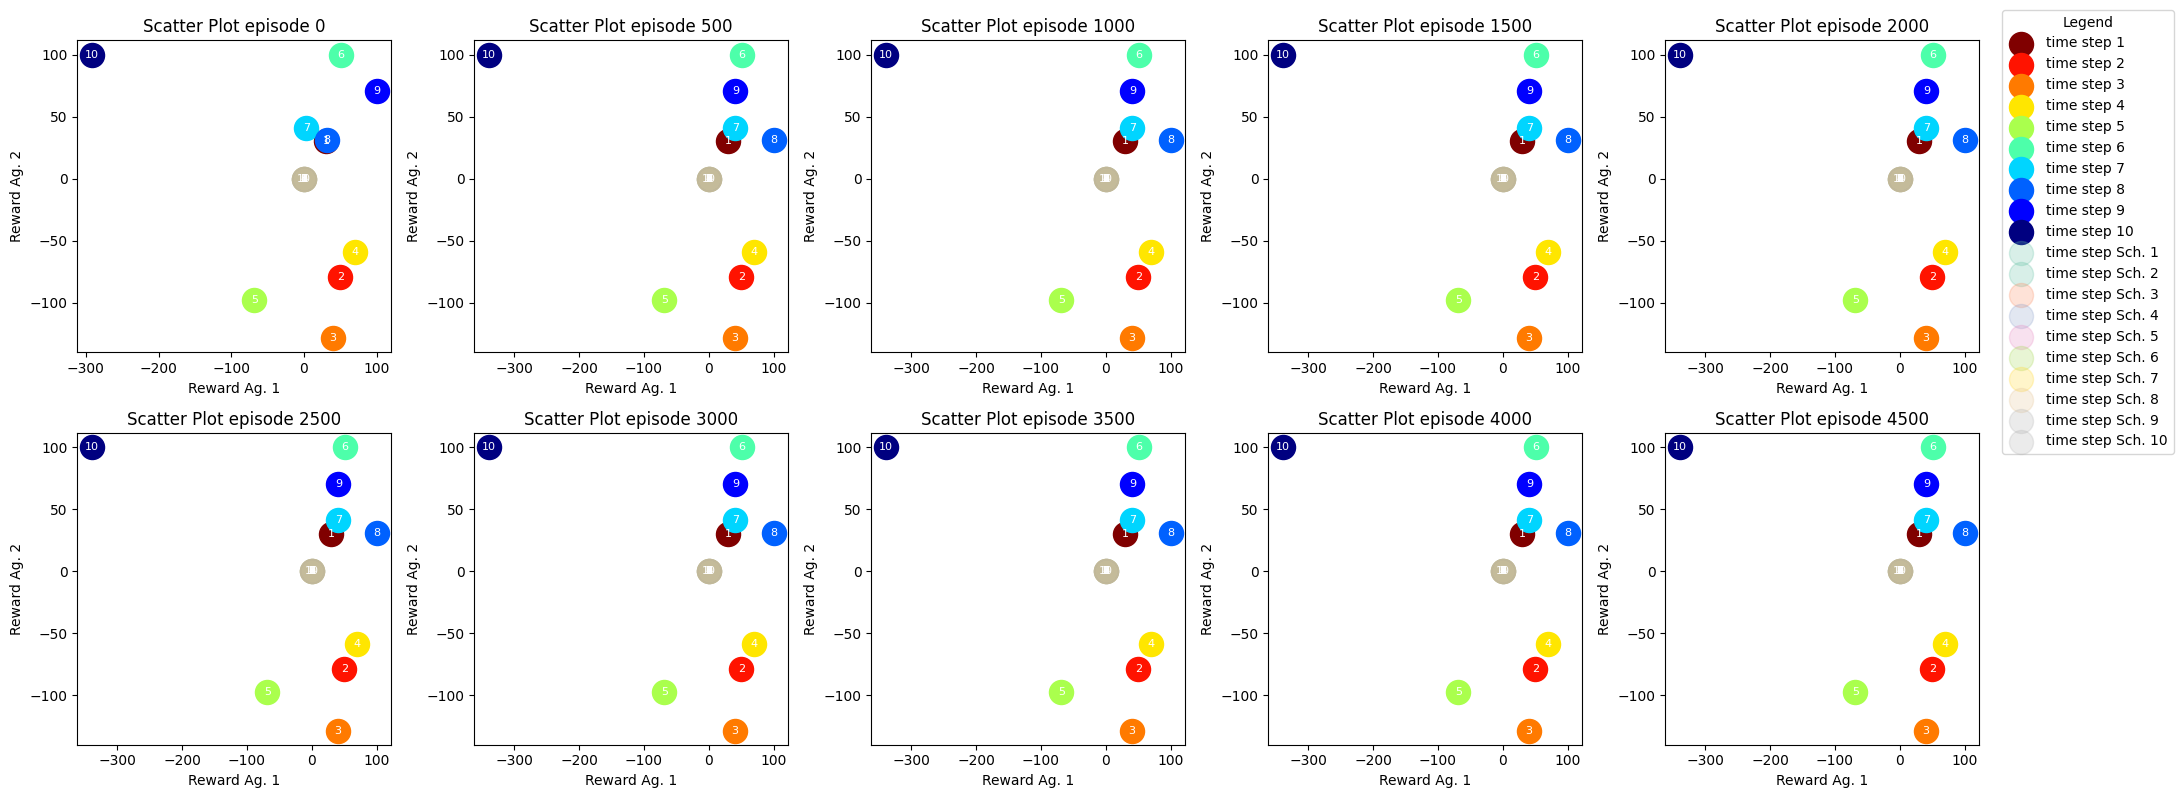

In [58]:
'''Rewards per time steps per entrambi gli agenti'''

# Load data
rewards = dict(np.load('C:/Users/macri/Desktop/ennesima//re.npz', allow_pickle=True))
rewards_sch = dict(np.load('C:/Users/macri/Desktop/multi/20-inv/theo/re.npz', allow_pickle=True))
rewards_0     = (rewards['arr_0'][0]    )
rewards_1     = (rewards['arr_0'][1]    )

rewards['arr_0'][0].shape
rewards_sch_0 = (rewards_sch['arr_0'][0])*0
rewards_sch_1 = (rewards_sch['arr_0'][1])*0

rewards_per_episode(rewards_0, rewards_1, rewards_sch_0, rewards_sch_1)

In [59]:
'''Coefficiente di correlazione tra i rewards per entrambi gli agenti'''
print('Agenti RL constrained: \n', np.corrcoef(rewards['arr_0'][0].flatten(), rewards['arr_0'][1].flatten()))
print('Agenti teorici: \n',np.corrcoef(rewards_sch['arr_0'][0].flatten(), rewards_sch['arr_0'][1].flatten()))

Agenti RL constrained: 
 [[ 1.         -0.27154961]
 [-0.27154961  1.        ]]
Agenti teorici: 
 [[1. 1.]
 [1. 1.]]


In [54]:
re_tot = np.load('C:/Users/macri/Desktop/ennesima/re_tot.npy')

for i in range(1, 10):
    rewards_per_episode(re_tot[i,0], re_tot[i,1], rewards_sch_0, rewards_sch_1, multiple=True)
#rewards_per_episode(re_tot[0,0], re_tot[0,1] , rewards_sch_0, rewards_sch_1, multiple=True)

IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
for i in range(101):
    print('jump = ', np.round(np.random.exponential(10)))

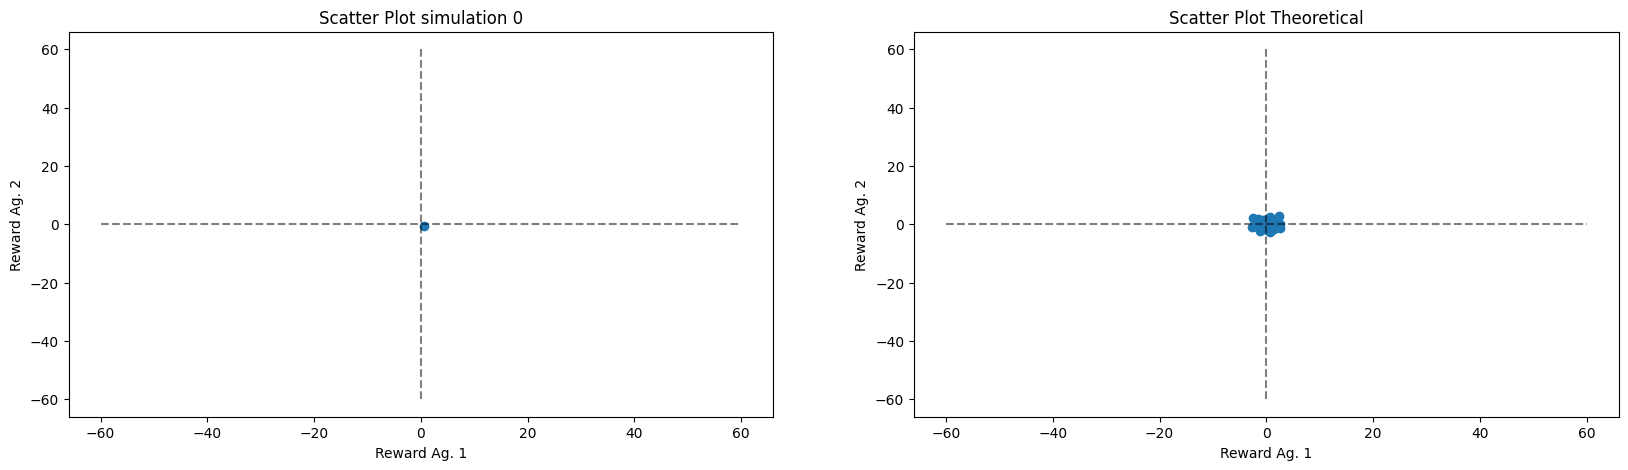

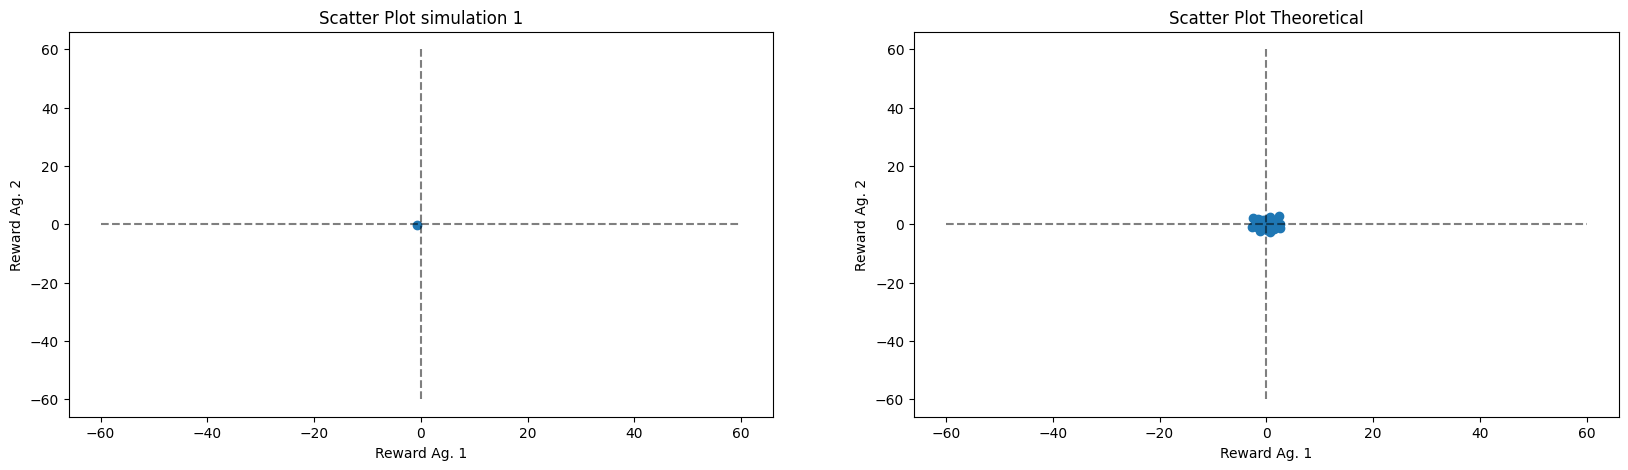

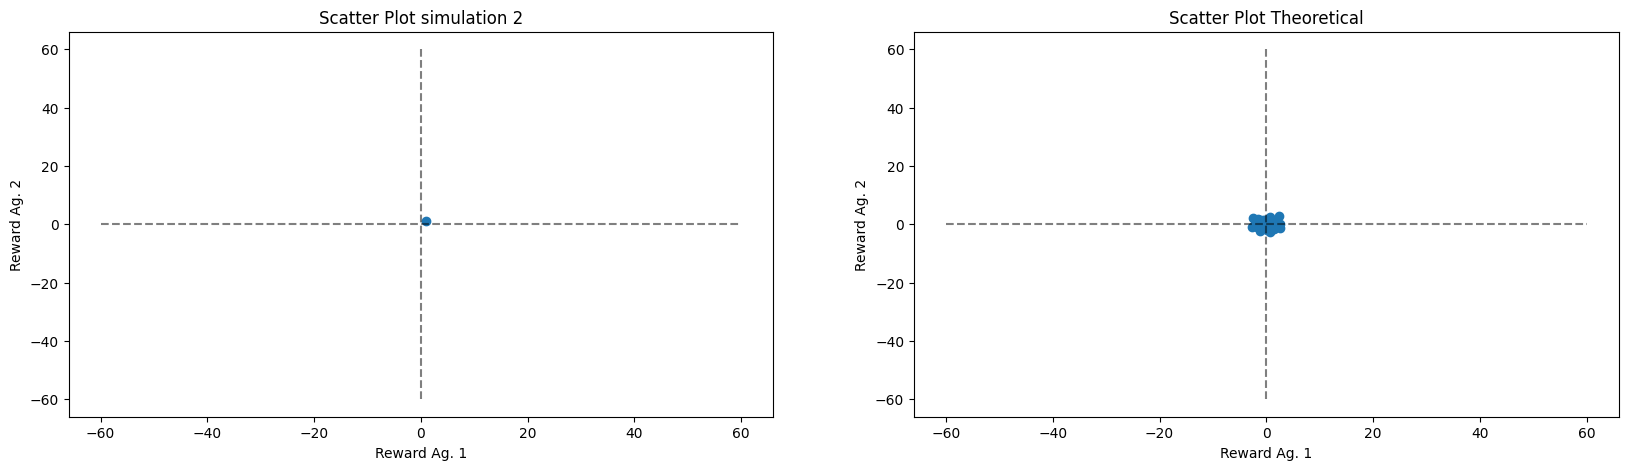

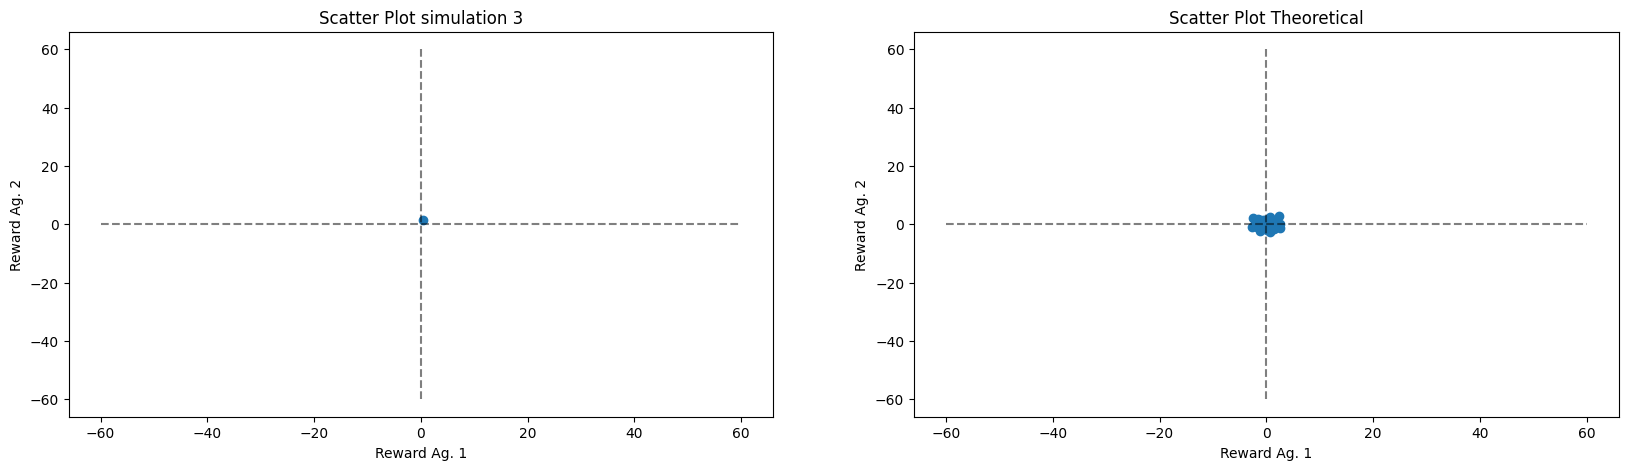

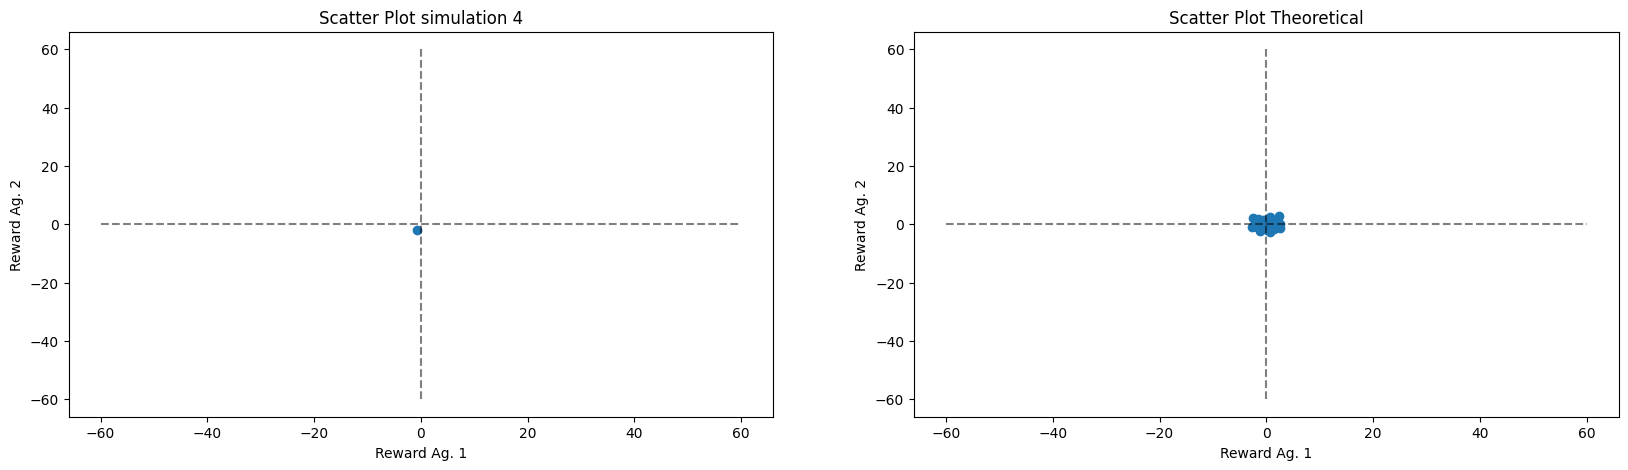

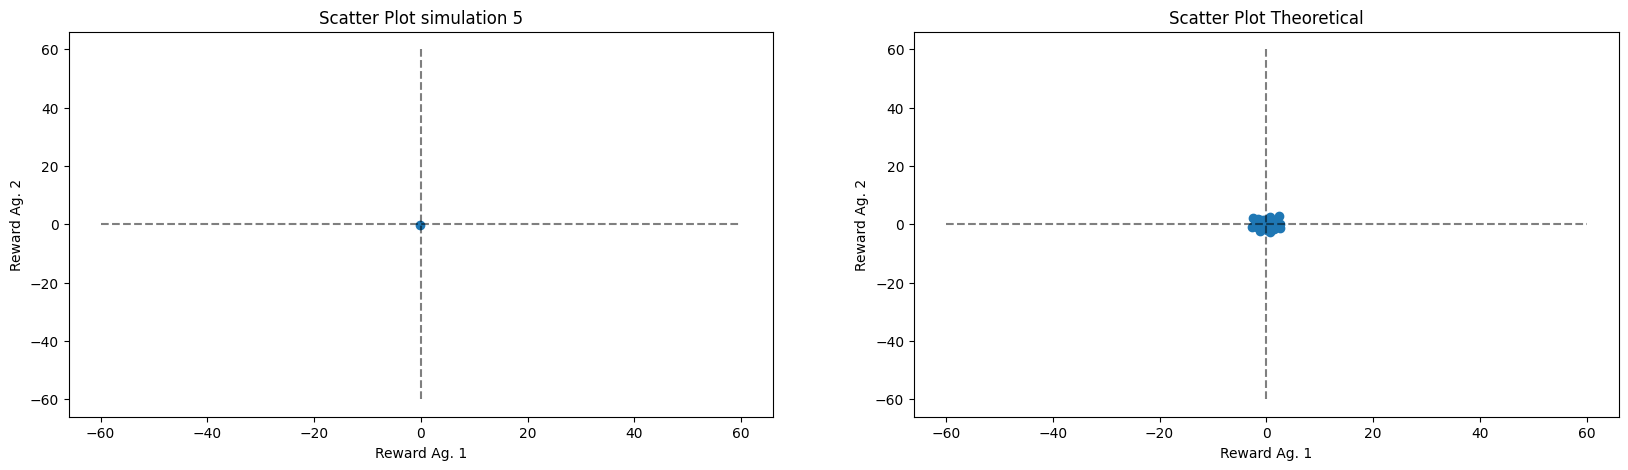

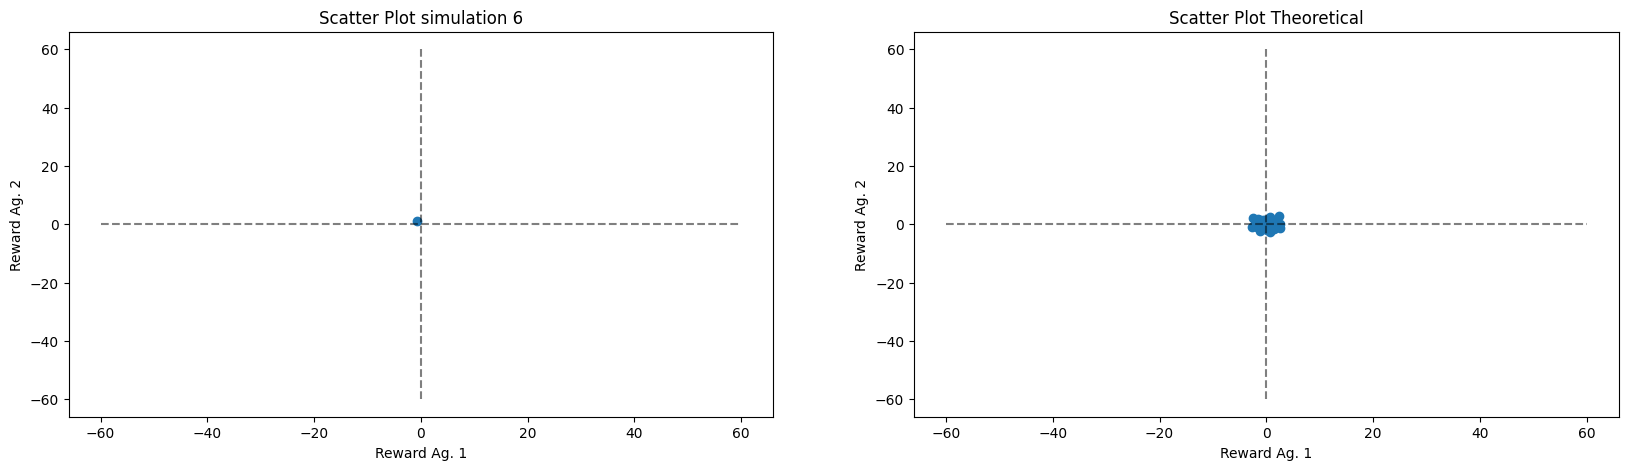

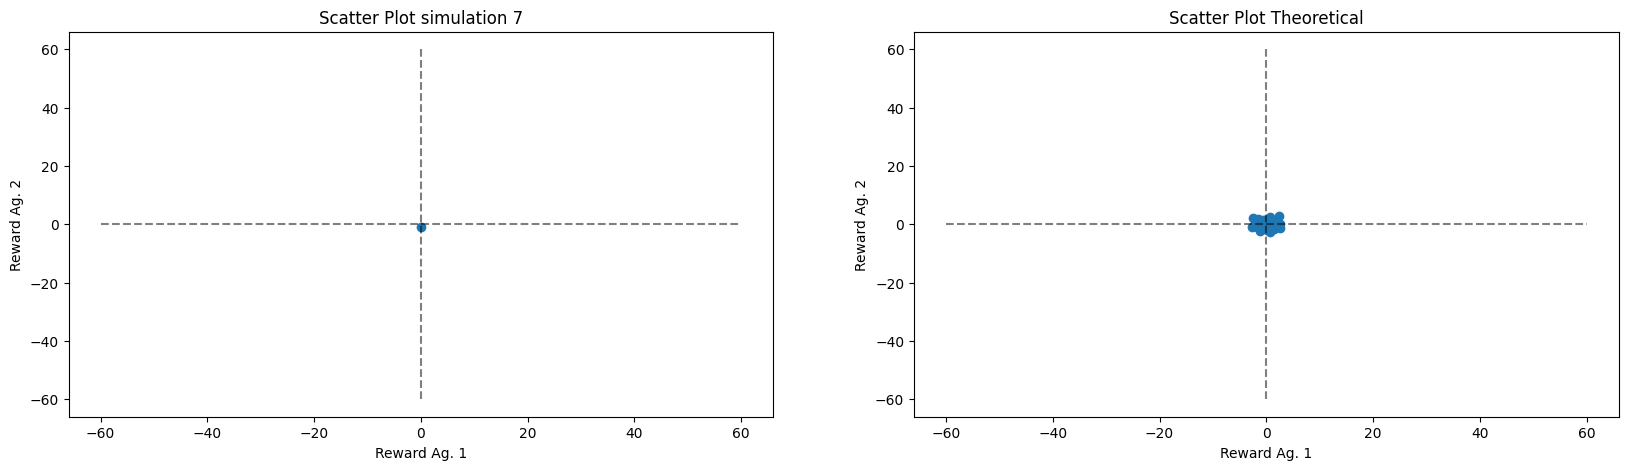

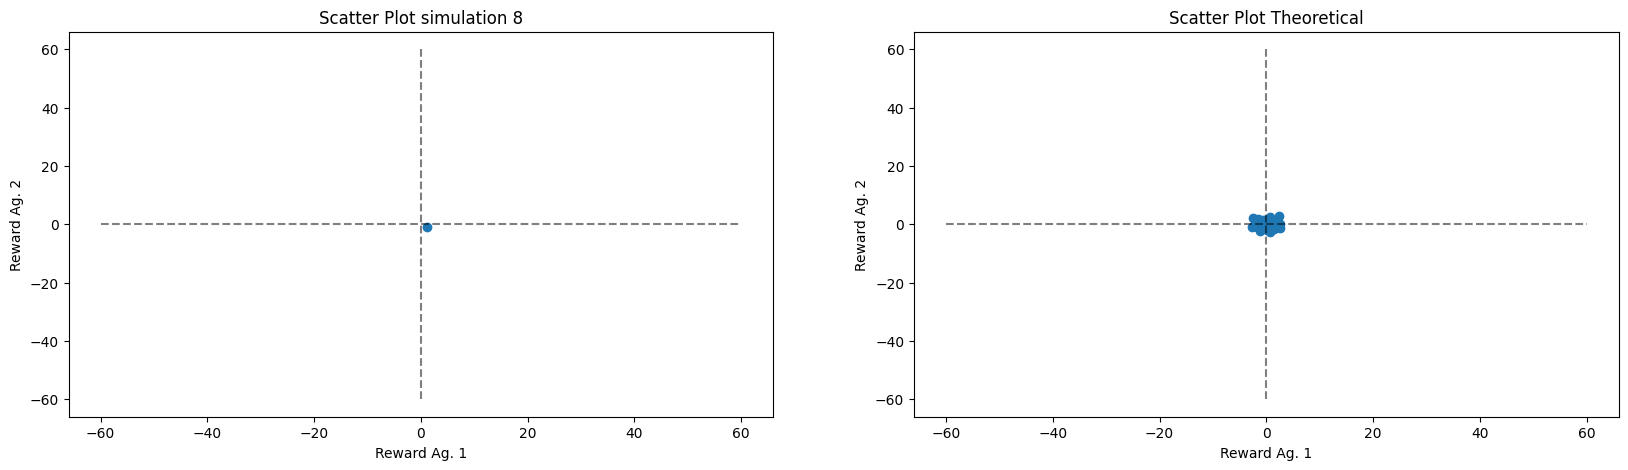

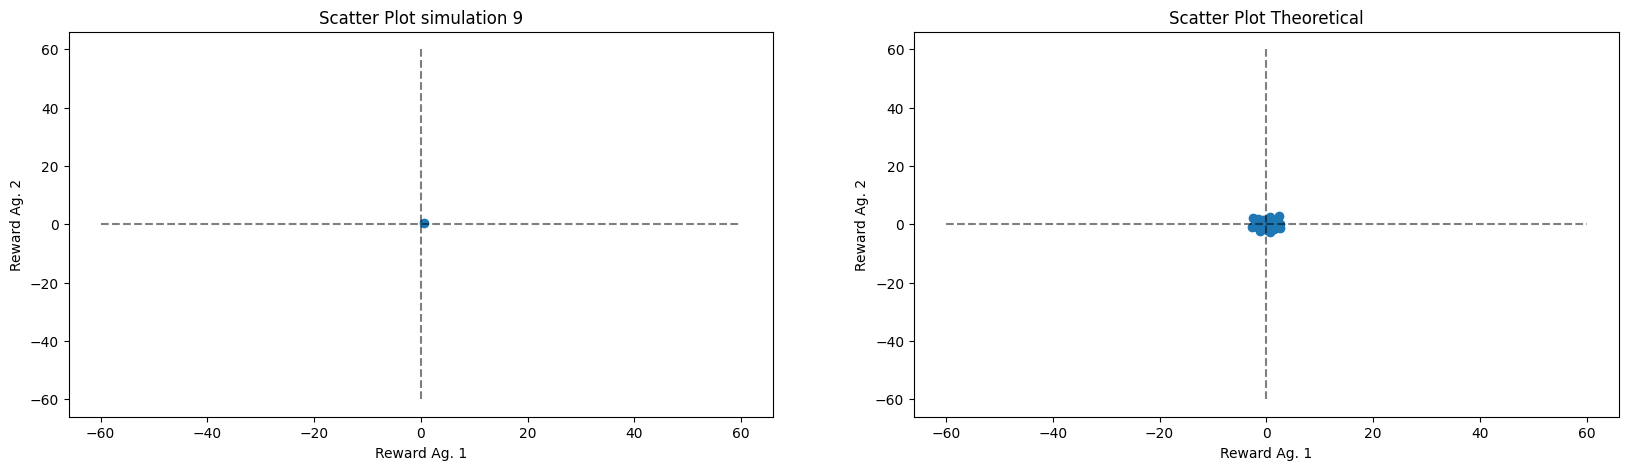

In [ ]:
'''Rewards per time steps per entrambi gli agenti'''

# Load data
rewards = dict(np.load('C:/Users/macri/Desktop/ennesima/re.npz', allow_pickle=True))
rewards_sch = dict(np.load('C:/Users/macri/Desktop/ennesima/re.npz', allow_pickle=True))
rewards_0 = rewards['arr_0'][0]
rewards_1 = rewards['arr_0'][1]

rewards_sch_0 = rewards_sch['arr_0'][0]
rewards_sch_1 = rewards_sch['arr_0'][1]

rewards_per_episode(rewards_0, rewards_1, rewards_sch_0, rewards_sch_1)

In [ ]:
'''Coefficiente di correlazione tra i rewards per entrambi gli agenti'''
print('Agenti RL constrained: \n', np.corrcoef(-rewards['arr_0'][0].flatten(), -rewards['arr_0'][1].flatten()))
print('Agenti teorici: \n',np.corrcoef(-rewards_sch['arr_0'][0].flatten(), -rewards_sch['arr_0'][1].flatten()))

Agenti RL constrained: 
 [[1.         0.78957163]
 [0.78957163 1.        ]]
Agenti teorici: 
 [[1. 1.]
 [1. 1.]]


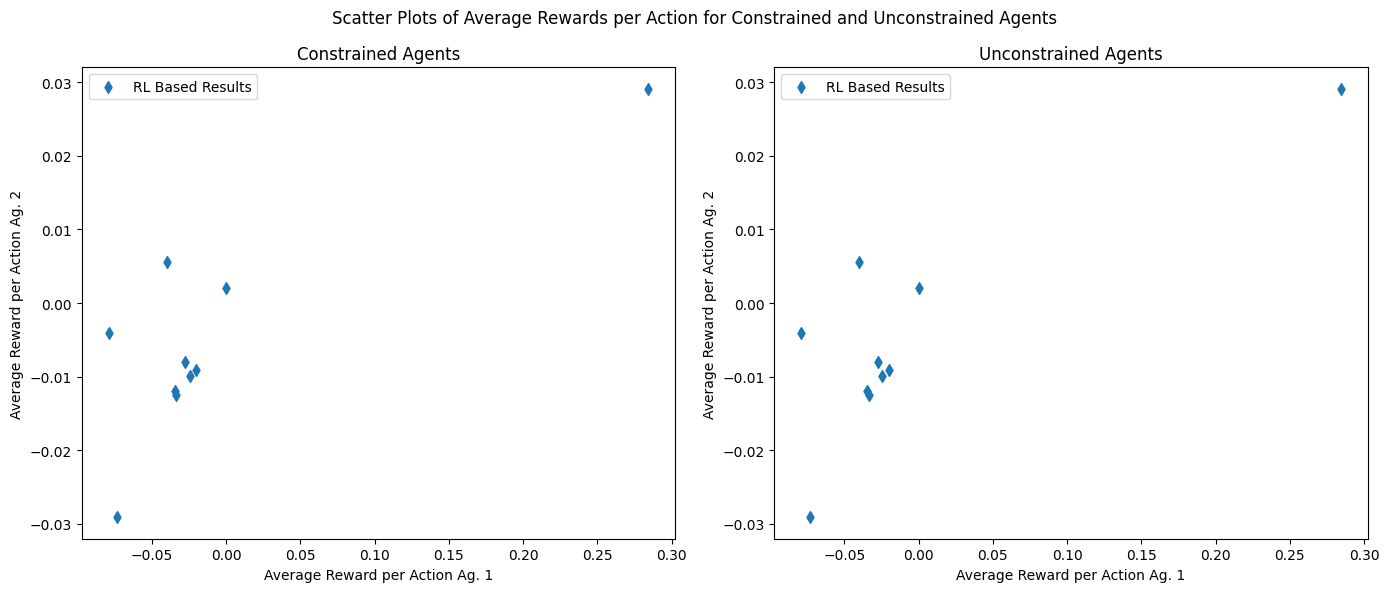

In [ ]:
a = 1 # è per reward per ogni episodio -> plotta 10 punti che sono i reward medi per ogni azione di trade che l'agente fa
      # 0 per reward totale -> plotta 5000 punti che sono i reward medi per ogni agente in ogni episodio
if a == 1:

    # Load data for theoretical agents
    rewards_sch = dict(np.load('qtp_multi_int_for_reward_study/base_theo_multi_fixed_imps/re.npz', allow_pickle=True)) #qtp_multi_int_for_reward_study/base_theo_multi_fixed_imps
    rewards_sch_0 = (rewards_sch['arr_0'][0].mean(a))
    rewards_sch_1 = (rewards_sch['arr_0'][0].mean(a))
    # Load data for constrained agents
    rewards_constrained = dict(np.load('C:/Users/macri/Desktop/ennesima//re.npz', allow_pickle=True))
    rewards_constrained_0 = (rewards_constrained['arr_0'][0].mean(a))
    rewards_constrained_1 = (rewards_constrained['arr_0'][1].mean(a))

    # Load data for unconstrained agents
    rewards_unconstrained = dict(np.load('C:/Users/macri/Desktop/ennesima//re.npz', allow_pickle=True))
    rewards_unconstrained_0 = (rewards_unconstrained['arr_0'][0].mean(a))
    rewards_unconstrained_1 = (rewards_unconstrained['arr_0'][1].mean(a))
else:
    
    # Load data for theoretical agents
    rewards_sch = dict(np.load('qtp_multi_int_for_reward_study/base_theo_multi_fixed_imps/re.npz', allow_pickle=True)) #qtp_multi_int_for_reward_study/base_theo_multi_fixed_imps
    rewards_sch_0 = 100-(rewards_sch['arr_0'][0].mean(a))
    rewards_sch_1 = 100-(rewards_sch['arr_0'][0].mean(a))
    # Load data for constrained agents
    rewards_constrained = dict(np.load('C:/Users/macri/Desktop/ennesima/re.npz', allow_pickle=True))
    rewards_constrained_0 = (rewards_constrained['arr_0'][0].mean(a))
    rewards_constrained_1 = (rewards_constrained['arr_0'][1].mean(a))

    # Load data for unconstrained agents
    rewards_unconstrained = dict(np.load('C:/Users/macri/Desktop/multi/multi_unc/re.npz', allow_pickle=True))
    rewards_unconstrained_0 = (rewards_unconstrained['arr_0'][0].mean(a))
    rewards_unconstrained_1 = (rewards_unconstrained['arr_0'][1].mean(a))

# Create figure and subplots
plt.figure(figsize=(14, 6))

# Plot scatter plot for constrained agents
plt.subplot(1, 2, 1)
plt.scatter(rewards_constrained_0, rewards_constrained_1, label='RL Based Results', marker='d')
#plt.scatter(rewards_sch_0/2, rewards_sch_1/2, label = 'Theoretical Results', marker = '+')
plt.xlabel('Average Reward per Action Ag. 1')
plt.ylabel('Average Reward per Action Ag. 2')
plt.title('Constrained Agents')
plt.legend()
#plt.xlim(-0.7, 5)  # Set x-axis limits
#plt.ylim(-0.7, 2.5)  # Set y-axis limits

# Plot scatter plot for unconstrained agents
plt.subplot(1, 2, 2)
plt.scatter(rewards_unconstrained_0, rewards_unconstrained_1, label='RL Based Results', marker='d')
#plt.scatter(rewards_sch_0/2, rewards_sch_1/2, label = 'Theoretical Results', marker = '+')
plt.xlabel('Average Reward per Action Ag. 1')
plt.ylabel('Average Reward per Action Ag. 2')
plt.title('Unconstrained Agents')
plt.legend()
#plt.xlim(-0.7, 5)  # Set x-axis limits
#plt.ylim(-0.7, 2.5)  # Set y-axis limits
plt.suptitle('Scatter Plots of Average Rewards per Action for Constrained and Unconstrained Agents')

plt.tight_layout()
plt.show()

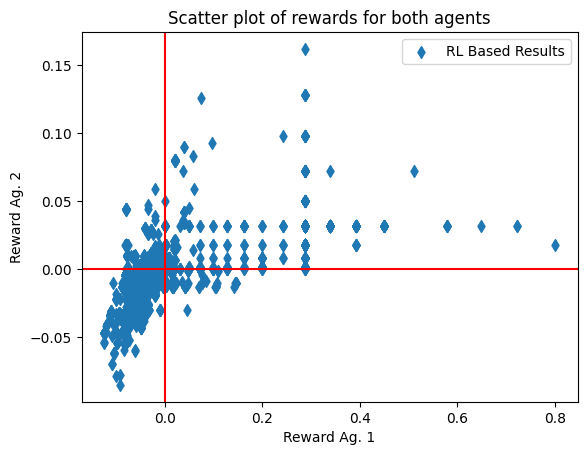

In [ ]:
'''Rewards totali per entrambi gli agenti'''
rewards = dict(np.load('C:/Users/macri/Desktop/ennesima//re.npz', allow_pickle=True))
plt.scatter(rewards['arr_0'][0].flatten()    , rewards['arr_0'][1].flatten()   , marker = 'd', label = 'RL Based Results')
#plt.scatter(rewards_sch['arr_0'][0].flatten(), rewards_sch['arr_0'][1].flatten(), marker = '+', label = 'Theoretical Results')
plt.title('Scatter plot of rewards for both agents')
plt.legend()
plt.xlabel('Reward Ag. 1')
plt.ylabel('Reward Ag. 2')
plt.axvline(0,0, color = 'r')
plt.axhline(0,0, color = 'r');

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_rewards(re_tot, rewards_sch_0, rewards_sch_1, time_steps_to_plot):
    fig, axs = plt.subplots(2, 10, figsize=(20, 8))

    for episode in range(10):  # Loop through agents
        for agent in range(2):  # Loop through episodes
            ax = axs[episode, agent]

            for time_step in time_steps_to_plot:
                for j in range(len(rewards_0)):
                    ax.scatter(rewards_0[j, time_step], rewards_1[j, time_step], color=colors[j], s=100, alpha=1, label=f'time step {j+1}')
                    ax.text(rewards_0[j, time_step], rewards_1[j, time_step], str(j+1), ha='center', va='center', fontsize=8, color='white')

                ax.scatter(rewards_0[episode, agent], rewards_1[episode, agent],
                           color='blue', s=100, alpha=1, label=f'time step {time_step+1}')
                ax.text(rewards_0[episode, agent], rewards_1[episode, agent],
                        str(time_step+1), ha='center', va='center', fontsize=8, color='white')

                #ax.scatter(rewards_sch_0[episode, agent, time_step], rewards_sch_1[episode, agent, time_step],
                #           color='red', s=100, alpha=0.25, label=f'time step Sch. {time_step+1}')
                #ax.text(rewards_sch_0[episode, agent, time_step], rewards_sch_1[episode, agent, time_step],
                #        str(time_step+1), ha='center', va='center', fontsize=8, color='white')

            ax.set_xlabel('Reward Ag. 1')
            ax.set_ylabel('Reward Ag. 2')
            ax.set_title(f'Agent {agent+1}, Episode {episode+1}')

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1), title='Legend')
    plt.tight_layout()
    plt.show()

# Example usage
time_steps_to_plot = [0]  # Example time steps to plot

re_tot = np.load('C:/Users/macri/Desktop/ennesima/re_tot.npy')


In [ ]:
re_tot.shape

(10, 2, 10, 5000)

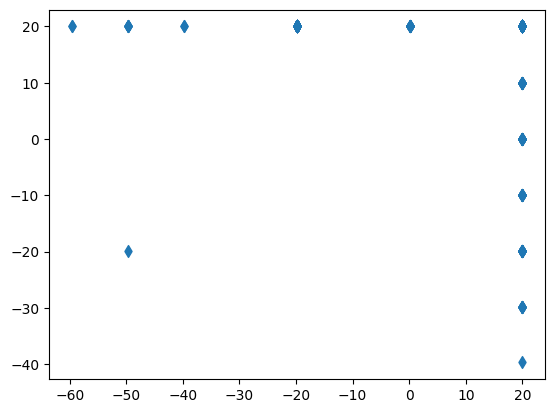

In [ ]:
plt.scatter(re_tot[simu, 0, j,:], re_tot[simu, 1, j,:], label = 'RL Based Results', marker = 'd')

IndexError: tuple index out of range

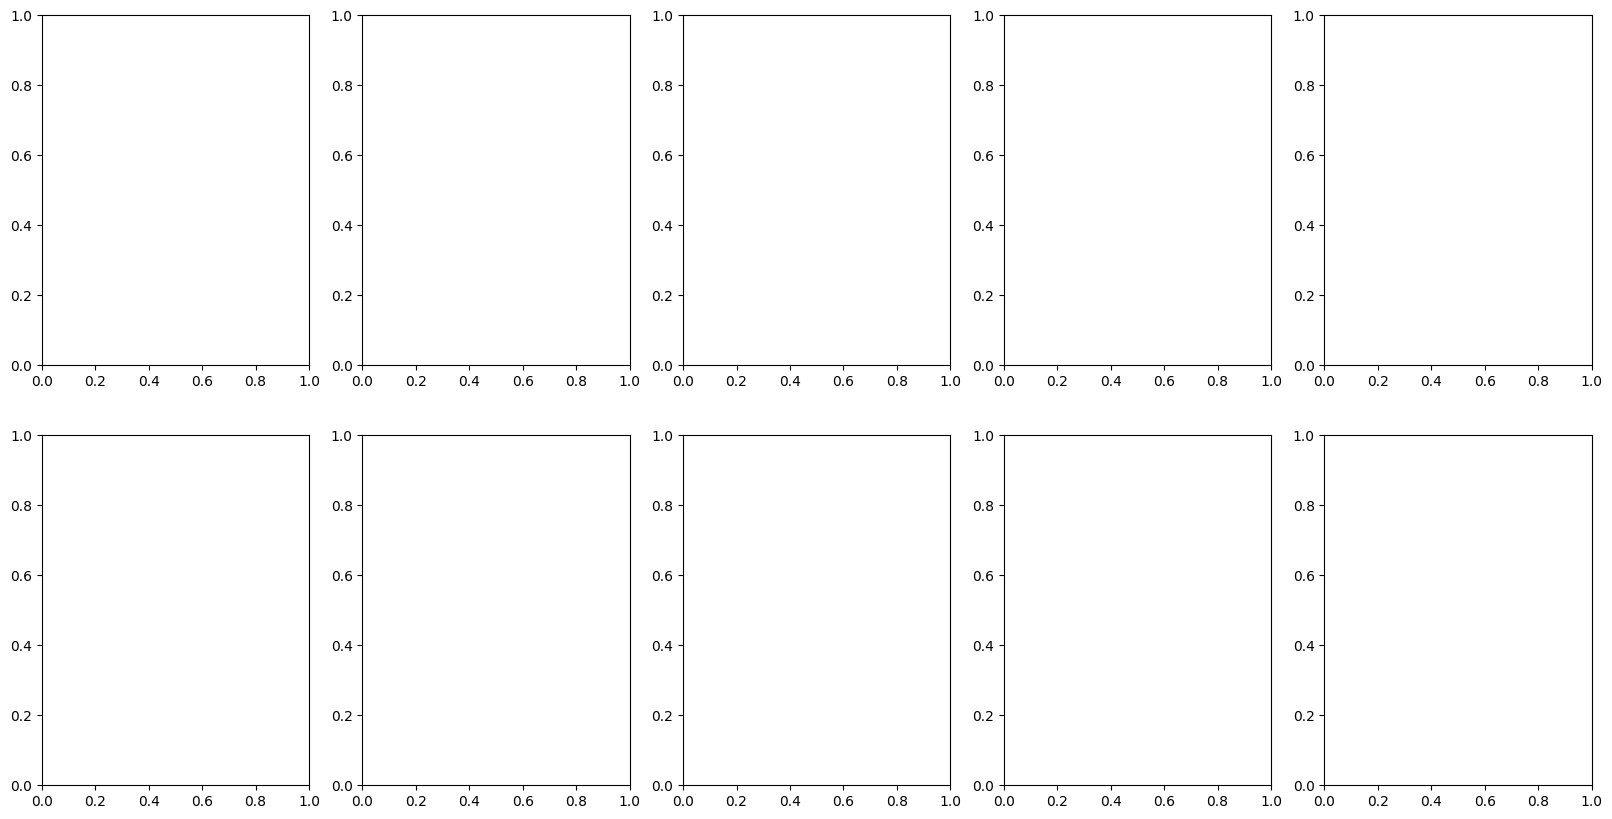

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load data
rewards = dict(np.load('C:/Users/macri/Desktop/ennesima//re.npz', allow_pickle=True))
rewards_sch = dict(np.load('C:/Users/macri/Desktop/multi/theo/re.npz', allow_pickle=True))
rewards_0     = 20-(-rewards['arr_0'][0]    )
rewards_1     = 20-(-rewards['arr_0'][1]    )

rewards['arr_0'][0].shape
rewards_sch_0 = (rewards_sch['arr_0'][0])
rewards_sch_1 = (rewards_sch['arr_0'][1])

# Assuming re_tot, rewards_0, rewards_1, and rewards_sch_0 have been defined earlier

fig, axs = plt.subplots(2, 5, figsize=(20, 10))  # 2 rows, 5 columns

colors = plt.cm.jet_r(np.linspace(0, 1, re_tot.shape[2]))  # Different colormap for rewards_0
colors_sch = plt.cm.Set2(np.linspace(0, 1, len(rewards_sch_0)))

for simu in range(min(re_tot.shape[0], 10)):  # Iterate over simulation steps, limited to 10
    row = simu // 5  # Determine the row index
    col = simu % 5  # Determine the column index
    ax = axs[row, col]
    for j in range(re_tot.shape[2]):  # Iterate over the simulation steps
        # Accessing individual elements of re_tot[simu, 0, j] and re_tot[simu, 1, j]
        ax.scatter(re_tot[simu, 0, j, -1].item(), re_tot[simu, 1, j, -1].item(),
                   color=colors[j], s=100, alpha=1, label=f'time step {j+1}')
        ax.text(re_tot[simu, 0, j, -1].item(), re_tot[simu, 1, j, -1].item(),
                str(j+1), ha='center', va='center', fontsize=8, color='white')

    
        ax.set_xlabel('Reward Ag. 1')
        ax.set_ylabel('Reward Ag. 2')
        ax.hlines(0, -300, 400, colors='k', linestyles='dashed', alpha=0.5)
        ax.vlines(0, -200, 400, colors='k', linestyles='dashed', alpha=0.5)
        ax.set_title(f'Scatter Plot simulation {simu+1}')

        
        ax.scatter(rewards_sch_0[j,-1].item(), rewards_sch_1[ j,-1].item(),
                     color=colors_sch[j], s=100, alpha=0.25, label=f'time step Sch. {j+1}')
        ax.text(rewards_sch_0[ j,-1].item(), rewards_sch_1[ j,-1].item(),
                str(j+1), ha='center', va='center', fontsize=8, color='white')
    

    for ax in axs.flat:
        ax.set_xlim(-100,100)
        ax.set_ylim(-100,100)

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1), title='Legend')
    fig.suptitle('Scatter Plots of Average Rewards per Time Step for Unconstrained Agents over 10 Simulations')


plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [ ]:

plot_rewards(re_tot, rewards_sch_0, rewards_sch_1, time_steps_to_plot)
